<a href="https://colab.research.google.com/github/KetakiN/Springboard/blob/main/NYSDOH_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from google.colab import files

In [2]:
df=pd.read_csv('/content/sample_data/nysdoh_cleaned.csv')

In [3]:
df=df.drop('Unnamed: 0',axis=1)

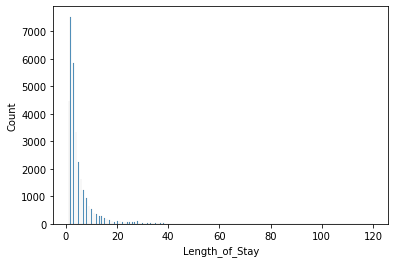

In [4]:
sns.histplot(x=df['Length_of_Stay'],data=df)
plt.show()

In [5]:
df.Length_of_Stay.describe()

count    31612.000000
mean         5.267367
std          7.504313
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        120.000000
Name: Length_of_Stay, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


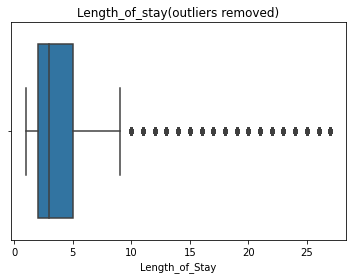

In [6]:
#Remove 5% outliers
std=df['Length_of_Stay'].std()
mean=df['Length_of_Stay'].mean()
cutoff=std*3
lower,upper=mean-cutoff,mean+cutoff
trimmed_df=df[(df['Length_of_Stay']>lower)&(df['Length_of_Stay']<upper)]
sns.boxplot(trimmed_df['Length_of_Stay'])
plt.title('Length_of_stay(outliers removed)')
#plt.savefig('box_length.png')

plt.show()

In [7]:
files.download('box_length.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
df=trimmed_df

In [9]:
df.Length_of_Stay.describe()

count    31021.000000
mean         4.511911
std          4.227992
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         27.000000
Name: Length_of_Stay, dtype: float64

In [10]:
#length of stay data is right skewed
#create age bins
bins=[-np.inf,10,20,30,np.inf]
#bin labels
labels=[0,1,2,3]
df['length_groups']=pd.cut(df['Length_of_Stay'],bins,labels=labels)

In [11]:
df['length_groups']=df['length_groups'].astype(int)

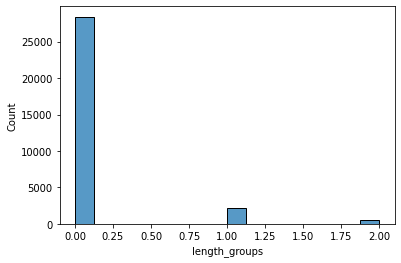

In [12]:
sns.histplot(x=df['length_groups'])
plt.show()

In [13]:
# remap age groups
df.Age_Group.unique()

array(['30 to 49', '50 to 69', '70 or Older', '18 to 29', '0 to 17'],
      dtype=object)

In [14]:
dict={'70 or Older':4, '50 to 69':3,'30 to 49':2 , '18 to 29':1, '0 to 17':0}

In [15]:
df=df.replace({'Age_Group':dict})

In [16]:
df.dtypes

Hospital_Service_Area              object
Hospital_County                    object
Facility_Name                      object
Age_Group                           int64
Zip_Code___3_digits                object
Gender                             object
Race                               object
Length_of_Stay                    float64
Type_of_Admission                  object
CCS_Diagnosis_Code                float64
CCS_Diagnosis_Description          object
CCS_Procedure_Code                float64
CCS_Procedure_Description          object
Payment_Typology_1                 object
Emergency_Department_Indicator     object
length_groups                       int64
dtype: object

In [17]:
df.Age_Group.unique()

array([2, 3, 4, 1, 0])

In [18]:
#

In [19]:
df[df['CCS_Procedure_Code']!=0].value_counts().sum()

21776

In [20]:
# There are 258 different types of diagnosis categories.Lets take a look at the top 17 most occurring
common_diag=df[df.groupby('CCS_Diagnosis_Description')['CCS_Diagnosis_Description'].transform('size') >400]
common_diag['CCS_Diagnosis_Description'].unique().shape
common_diag['CCS_Diagnosis_Description'].unique()

array(['Mood disorders', 'Septicemia (except in labor)',
       'Chronic obstructive pulmonary disease and bronchiectasis',
       'Acute cerebrovascular disease',
       'Congestive heart failure; nonhypertensive', 'Osteoarthritis',
       'Cardiac dysrhythmias', 'Prolonged pregnancy', 'Liveborn',
       'Spondylosis; intervertebral disc disorders; other back problems',
       'Complication of device; implant or graft',
       'Diabetes mellitus with complications',
       'Acute myocardial infarction', 'Alcohol-related disorders',
       'Pneumonia (except that caused by tuberculosis or sexually transmitted disease)',
       'Complications of surgical procedures or medical care',
       'Skin and subcutaneous tissue infections'], dtype=object)

In [21]:
common_diag['CCS_Diagnosis_Description'].describe()

count        13763
unique          17
top       Liveborn
freq          2776
Name: CCS_Diagnosis_Description, dtype: object

In [22]:
df=common_diag

In [23]:
df.shape

(13763, 16)

In [24]:
dict={'Mood disorders':'Mood', 'Septicemia (except in labor)':'Sept',
       'Chronic obstructive pulmonary disease and bronchiectasis':'COPD',
       'Acute cerebrovascular disease':'Cereb',
       'Congestive heart failure; nonhypertensive':'CHF', 'Osteoarthritis':'OA',
       'Cardiac dysrhythmias':'CardO', 'Prolonged pregnancy':'PregP', 'Liveborn':'LivB',
       'Spondylosis; intervertebral disc disorders; other back problems':'Spondy',
       'Complication of device; implant or graft':'Comp',
       'Diabetes mellitus with complications':'DM',
       'Acute myocardial infarction':'MI', 'Alcohol-related disorders':'ALCH',
       'Pneumonia (except that caused by tuberculosis or sexually transmitted disease)':'PNU',
       'Complications of surgical procedures or medical care':'Comp',
       'Skin and subcutaneous tissue infections':'Skin'}

In [25]:
df=df.replace({'CCS_Diagnosis_Description':dict})


In [26]:
df['CCS_Diagnosis_Description'].unique()

array(['Mood', 'Sept', 'COPD', 'Cereb', 'CHF', 'OA', 'CardO', 'PregP',
       'LivB', 'Spondy', 'Comp', 'DM', 'MI', 'ALCH', 'PNU', 'Skin'],
      dtype=object)

In [27]:
dfdiag=df.groupby('CCS_Diagnosis_Description')['Length_of_Stay'].mean().reset_index()
dfdiag=dfdiag.sort_values('Length_of_Stay')
dfdiag.head()

,CCS_Diagnosis_Description,Length_of_Stay
12,PregP,2.628079
7,LivB,2.792867
10,OA,2.840442
15,Spondy,2.991763
3,CardO,3.480831


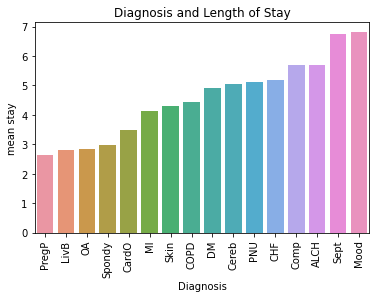

In [28]:
ax=sns.barplot(x='CCS_Diagnosis_Description',y='Length_of_Stay',data=dfdiag)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.xlabel('Diagnosis')
plt.ylabel('mean stay')
plt.title('Diagnosis and Length of Stay')
plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig('bar_diagnosis.png')
plt.show()
    
  

In [29]:
#files.download('bar_diagnosis.png')

In [33]:
df.to_csv('nysdoh_feature.csv')

In [34]:

files.download('nysdoh_feature.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
df.CCS_Procedure_Description.describe()

count       13763
unique        174
top       NO PROC
freq         4325
Name: CCS_Procedure_Description, dtype: object